In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
# Load the dataset
data = pd.read_csv('C:/Users/HP/Desktop/financial_risk_assessment.csv')  # Replace 'your_dataset.csv' with your dataset's path


In [12]:
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0       

In [13]:
print("\nData Description:")
print(data.describe(include='all'))



Data Description:
                 Age      Gender Education Level Marital Status  \
count   15000.000000       15000           15000          15000   
unique           NaN           3               4              4   
top              NaN  Non-binary      Bachelor's        Widowed   
freq             NaN        5059            3829           3893   
mean       43.452667         NaN             NaN            NaN   
std        14.910732         NaN             NaN            NaN   
min        18.000000         NaN             NaN            NaN   
25%        31.000000         NaN             NaN            NaN   
50%        43.000000         NaN             NaN            NaN   
75%        56.000000         NaN             NaN            NaN   
max        69.000000         NaN             NaN            NaN   

               Income  Credit Score   Loan Amount Loan Purpose  \
count    12750.000000  12750.000000  12750.000000        15000   
unique            NaN           NaN         

In [14]:
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64


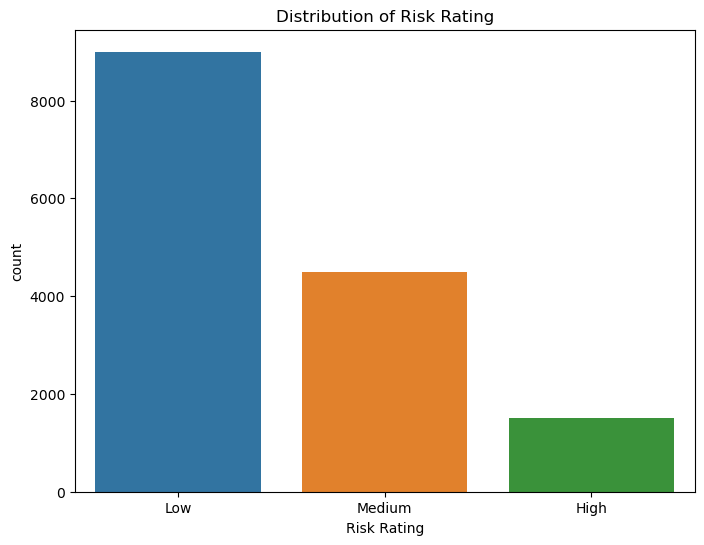

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk Rating', data=data)  # Replace 'Risk Rating' with your target column name
plt.title('Distribution of Risk Rating')
plt.show()



Missing values in numerical columns:
Age                         0
Income                   2250
Credit Score             2250
Loan Amount              2250
Years at Current Job        0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
Previous Defaults        2250
Marital Status Change       0
dtype: int64


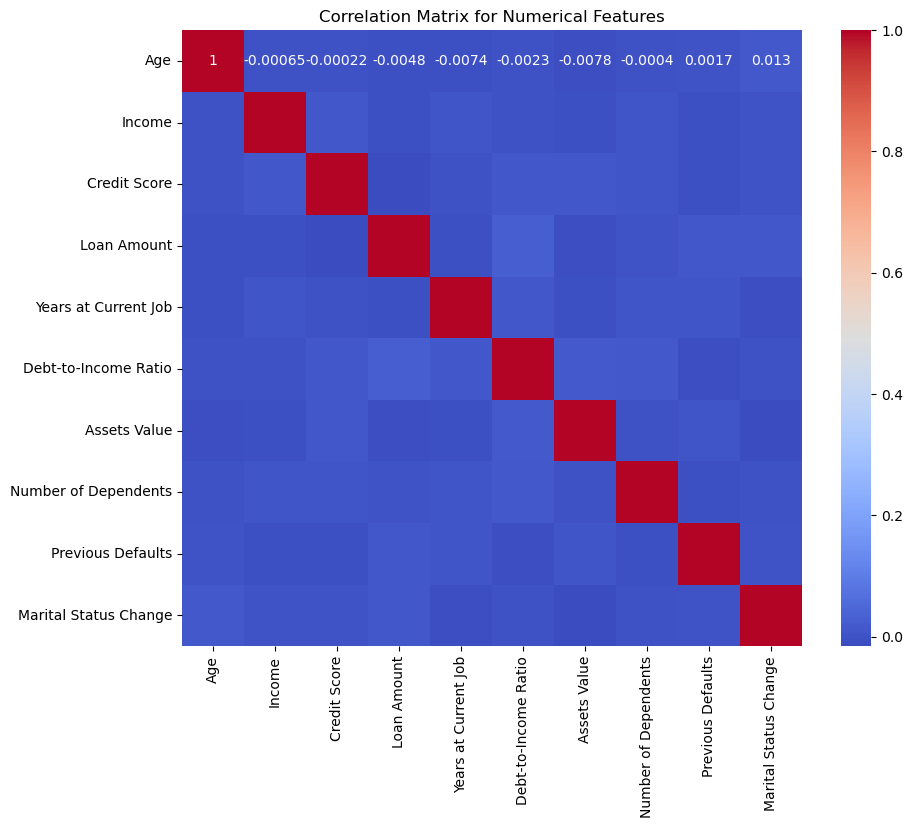

In [16]:
# Select only numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Check for any missing values in the numerical data
print("\nMissing values in numerical columns:")
print(numerical_data.isnull().sum())

# Fill missing values with the median (or any other strategy) for the heatmap visualization
numerical_data = numerical_data.fillna(numerical_data.median())

# Visualize the correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [17]:
# Separate features and target variable
X = data.drop('Risk Rating', axis=1)  # Replace 'Risk Rating' with your actual target column name if different
y = data['Risk Rating']


In [18]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [19]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [20]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [22]:
model = RandomForestClassifier(random_state=42)


In [23]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Previous Defaults', 'Marital Status Change'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
       'Employment Status', 'Payment History', 'City', 'State', 'Country'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [26]:
y_pred = pipeline.predict(X_test)


In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       326
         Low       0.59      1.00      0.74      1779
      Medium       0.40      0.00      0.00       895

    accuracy                           0.59      3000
   macro avg       0.33      0.33      0.25      3000
weighted avg       0.47      0.59      0.44      3000


Confusion Matrix:
[[   0  326    0]
 [   0 1776    3]
 [   0  893    2]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))



Cross-Validation Scores: [0.59933333 0.59933333 0.60033333 0.60066667 0.59833333]
Average Cross-Validation Score: 0.5996
